# Walkthrough
import the functions

In [1]:
from antarctic_plots import profile
from antarctic_plots import fetch

## Cross-section
define a start and end point for a profile, in EPSG:3031 projection

In [2]:
a = (-1200e3, -1400e3)
b = (1000e3, 1400e3)

sample bedmap2 layers between these points, and plot the cross section

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


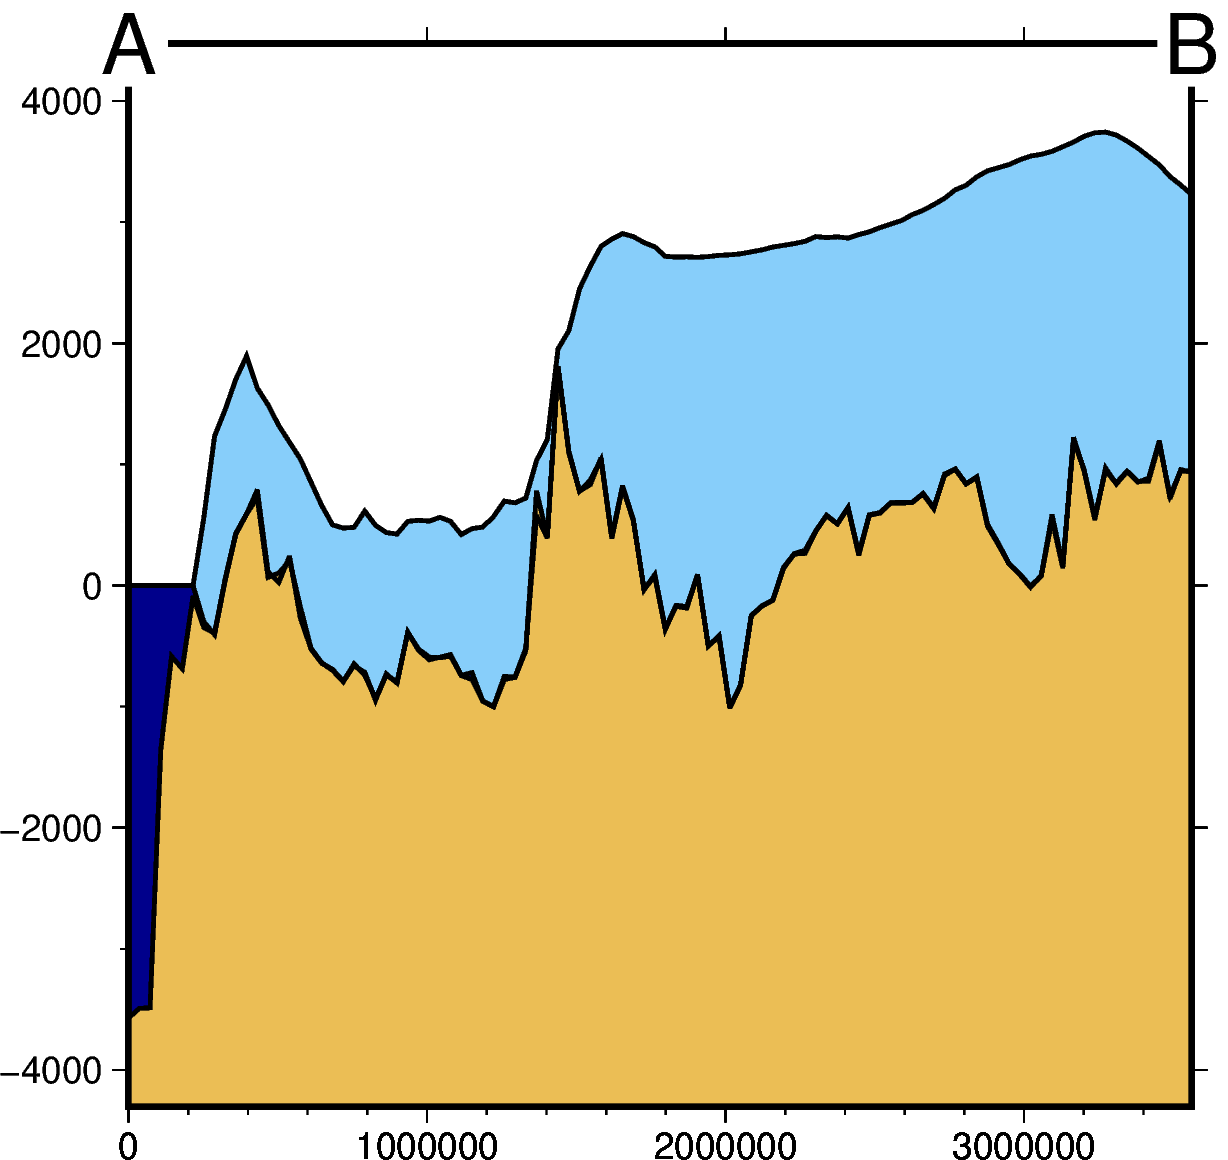

In [3]:
profile.plot_profile(
    method="points",
    start=a,
    stop=b,
    add_map=False,
)

increase the resolution with the parameter "num"

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


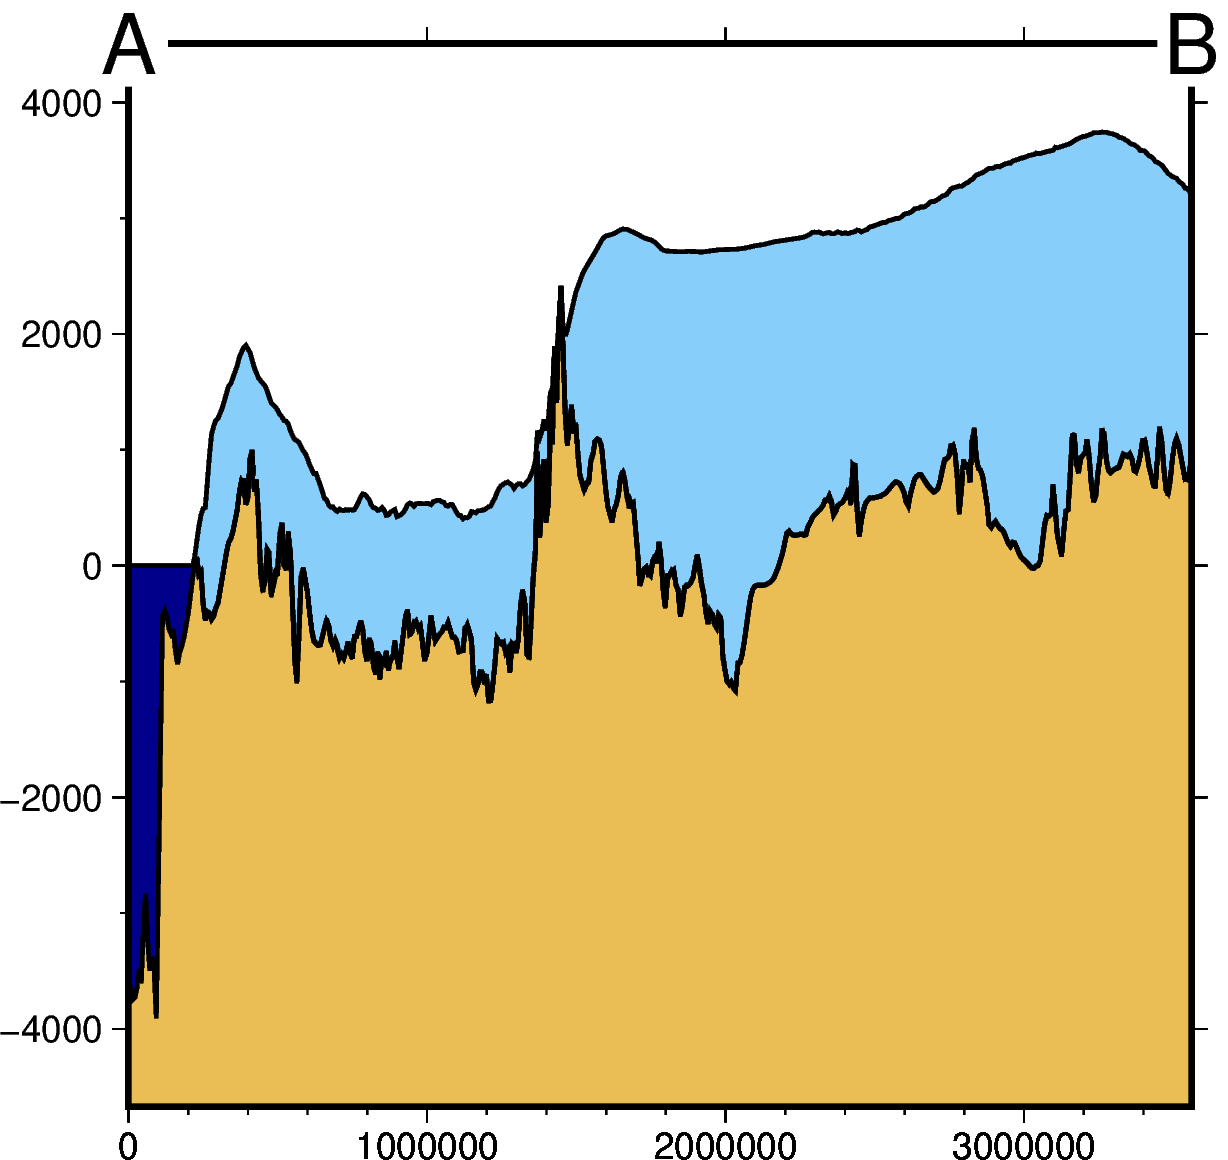

In [4]:
profile.plot_profile(
    method="points",
    start=a,
    stop=b,
    num=500,
    add_map=False,
)

Instead of a line defined by two points, sample along a shapefile.
Defaults to an included shapefile over the Ross Ice Shelf from Mulock Glacier to the ice front through Discover Deep.

PROJ: proj_create_from_database: SQLite error on SELECT key, value FROM metadata WHERE key IN ('DATABASE.LAYOUT.VERSION.MAJOR', 'DATABASE.LAYOUT.VERSION.MINOR'): no such table: metadata


filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


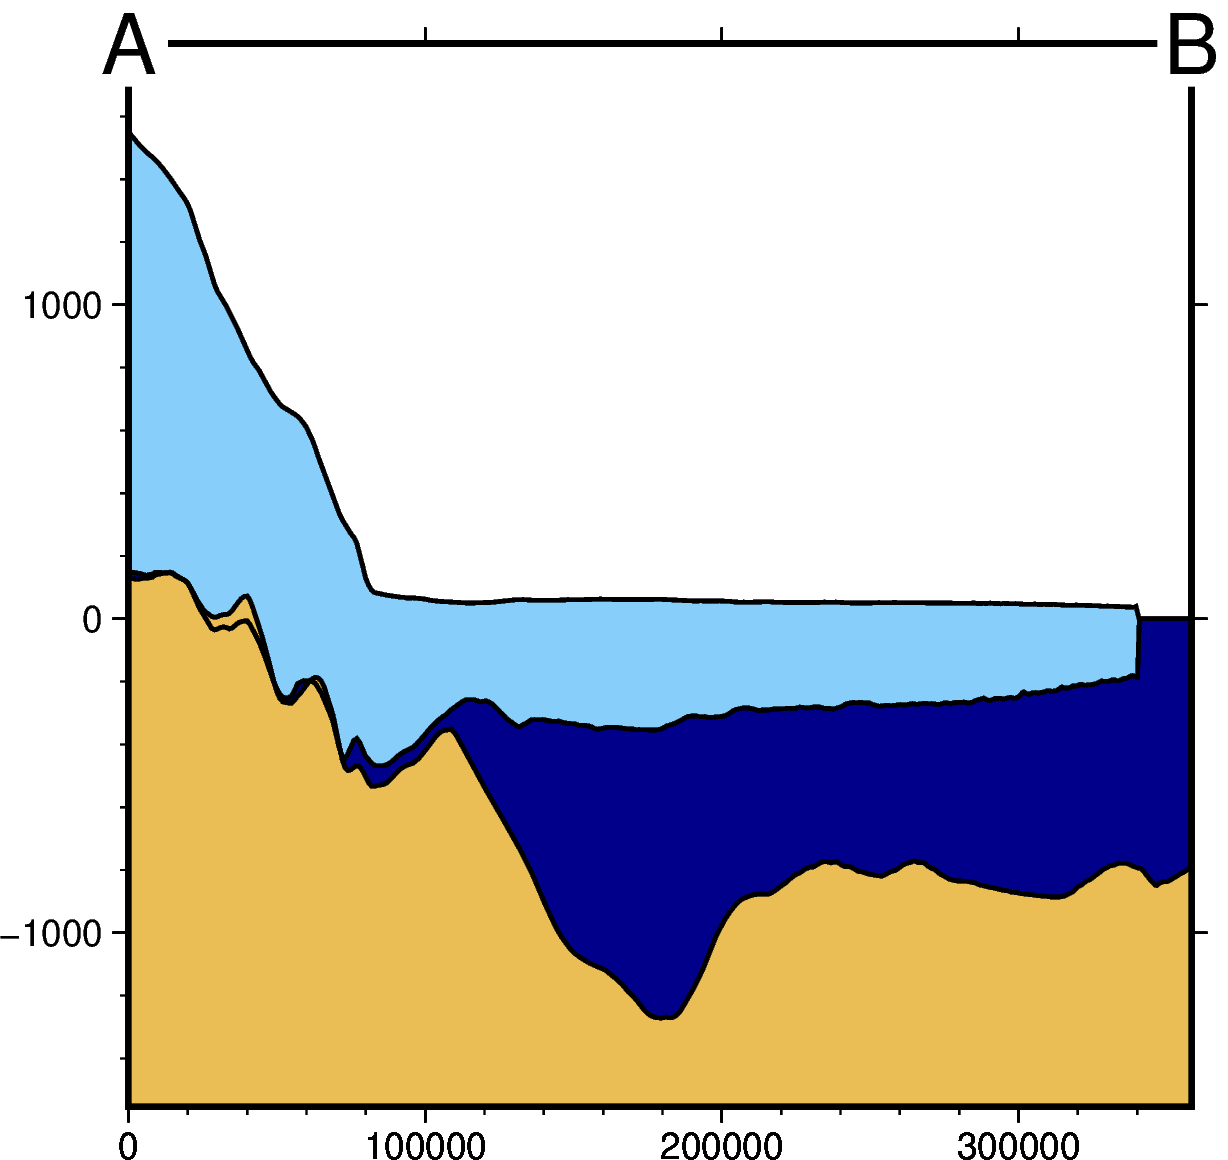

In [5]:
profile.plot_profile(
    method="shapefile",
    add_map=False,
)

change the sampling resolution with the parameter shp_num_points

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


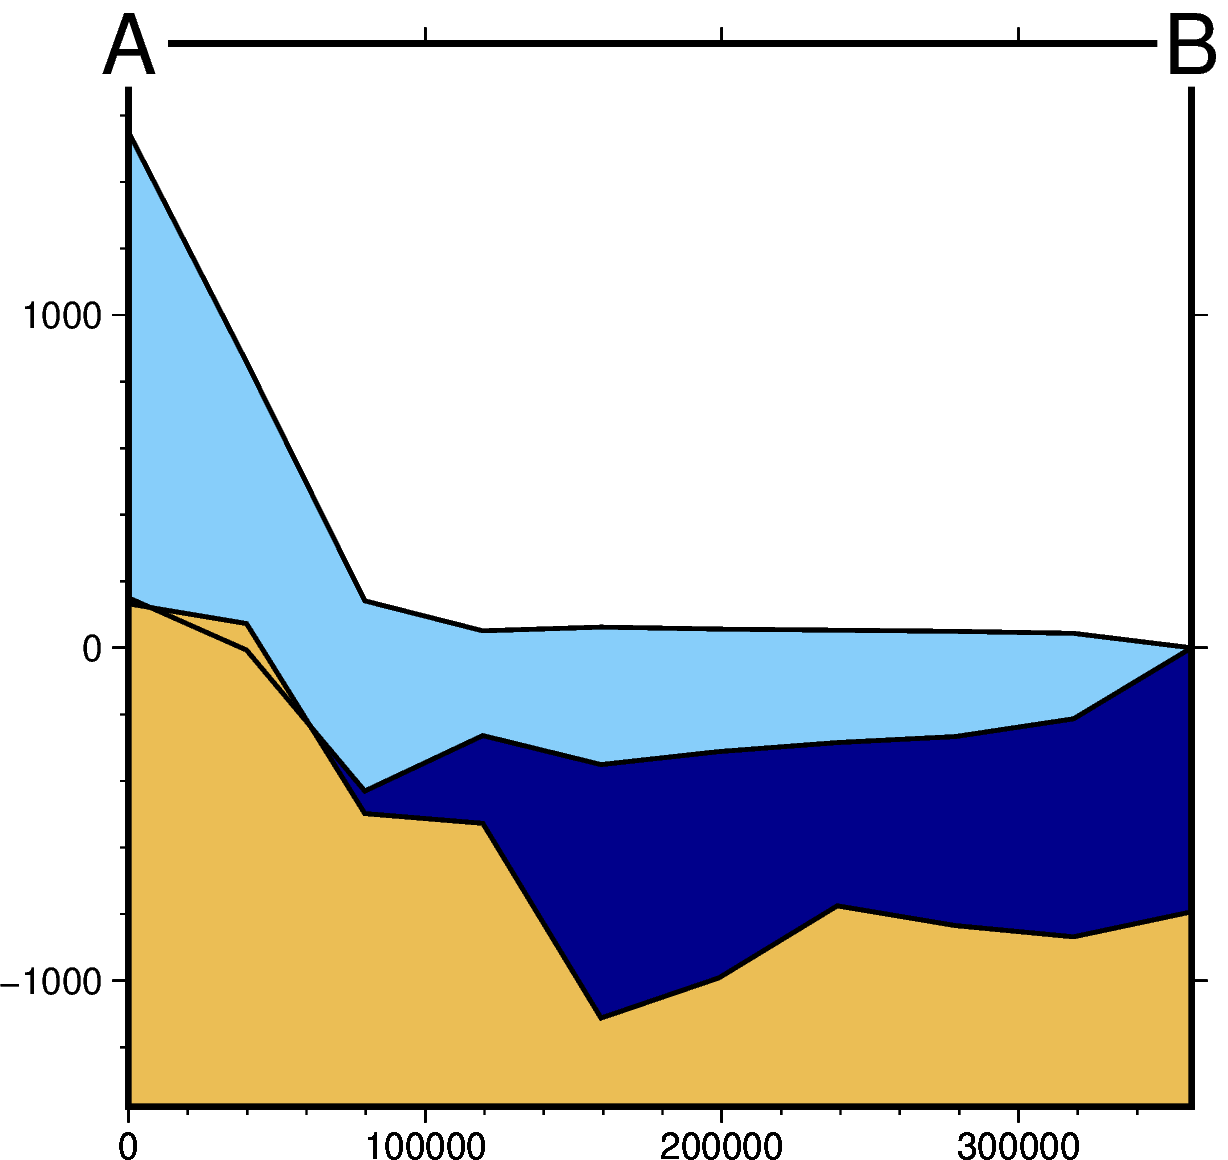

In [6]:

profile.plot_profile(
    method="shapefile",
    add_map=False,
    shp_num_points=10,
)

## Add map
add a map to show the profile location, background defaults to imagery

In [ ]:
profile.plot_profile(
    method="shapefile",
    add_map=True,
)

customize the map background; show the surface topography instead of imagery

In [ ]:
profile.plot_profile(
    method="shapefile", add_map=True, map_background=fetch.bedmap2("surface")
)

clip the profile (either end) based on distance

In [ ]:
profile.plot_profile(
    method="shapefile",
    add_map=True,
    clip=True,
    min_dist=50e3,
    max_dist=200e3,
)

## Add graph of data
Add a graph of data along the profile. Defaults two include gravity and magnetics

In [ ]:
profile.plot_profile(
    method="shapefile",
    add_map=True,
    data_dict="default",
    save=True,  # save the plot to use in README
    path="../cover_fig.png",
)

## custom layers, datasets, and shapefiles
The input for both the data and the layers are nested dictionaries, where each dataset is a dictionary which contains keys: 'name', 'grid', and 'color'.

Use the function, `profile.make_data_dict()` to help create these dictionaries.
It takes 3 inputs, which are an array of names, an array of grids (either file geotiff/netcdf file names or xarray.DataArrays, and an array of colors. 

For example, if you have a netcdf file 'ice_velocity.nc', you can make that into a dictionary with: 
    `profile.make_data_dict(['ice velocity'], ['ice_velocity.nc'], ['orange'])`

Within the module `antarctic_plots.fetch` is a series of functions to help download, store, and call datasets. Feel free to use the examples there to add your own datasets, and load them into `profile.make_data_dict()` as shown below.


In [ ]:
# note, these datafile can be plotted at higher resolution by adding parameter 'spacing' tp the 'fetch' function:
# fetch.gravity('BA', spacing=1e3) will use a 1km version of the Bouguer gravity anomaly.
data_dict = profile.make_data_dict(
    ["Bouguer gravity", "DeepBedMap"],
    [fetch.gravity("BA"), fetch.deepbedmap()],
    ["purple", "red"],
)

# get default bedmap2 layers
layers_dict = profile.default_layers()
# add dictionary entry of extra layer 'basement'
layers_dict["basement"] = {}
layers_dict["basement"]["name"] = "basement"
layers_dict["basement"]["grid"] = fetch.basement()
layers_dict["basement"]["color"] = "chocolate"

profile.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp(
        "Roosevelt_Island"
    ),  # to use your own shapefile, shapefile='yourshapefile.shp',
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
)

fill gaps in the input layers. Note that the additional layer 'basement', doesn't extend past the groundingline. By default, NaN's in any layer are set equal
to the layer above, causing the vertical line at ~100km.

In [ ]:
profile.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Roosevelt_Island"),
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    fillnans=False,
)

change the level of zoom on the map with the buffer_perc argument.
This is a percentage of total line distance, so in this case we zoom out by 80% of 330km, so ~260km

In [ ]:
profile.plot_profile(
    method="shapefile",
    shapefile=fetch.sample_shp("Roosevelt_Island"),
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    buffer_perc=0.8,
)